<a href="https://colab.research.google.com/github/Faareh-Ahmed/Segment-Green-Spaces/blob/main/Evaluation_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Accuracy Metrics for SAM2 generated Masks

In [1]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 29.1 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import rasterio

def compute_iou(y_pred, y_true):
    y_pred = y_pred.flatten()
    y_true = y_true.flatten()
    current = confusion_matrix(y_true, y_pred, labels=[0, 1])
    intersection = np.diag(current)
    ground_truth_set = current.sum(axis=1)
    predicted_set = current.sum(axis=0)
    union = ground_truth_set + predicted_set - intersection
    IoU = intersection / union.astype(np.float32)
    return np.mean(IoU)

def compute_dice(y_pred, y_true):
    y_pred = y_pred.flatten()
    y_true = y_true.flatten()
    current = confusion_matrix(y_true, y_pred, labels=[0, 1])
    intersection = np.diag(current)
    ground_truth_set = current.sum(axis=1)
    predicted_set = current.sum(axis=0)
    dice = (2 * intersection) / (ground_truth_set + predicted_set).astype(np.float32)
    return np.mean(dice)

def compute_pixel_accuracy(y_pred, y_true):
    y_pred = y_pred.flatten()
    y_true = y_true.flatten()
    current = confusion_matrix(y_true, y_pred, labels=[0, 1])
    correct_pixels = np.diag(current).sum()
    total_pixels = current.sum()
    pixel_accuracy = correct_pixels / total_pixels
    return pixel_accuracy

# Load the images
with rasterio.open('/content/sample_data/segment_12NDVI_another.tif') as ndvi_file:
    ndvi_image = ndvi_file.read(1)  # Read the first band
    ndvi_image = (ndvi_image > 0.6).astype(np.uint8)

with rasterio.open('/content/sample_data/mask_12.tif') as sam_file:
    sam_mask = sam_file.read(1)  # Read the first band
    sam_mask=(sam_mask > 0).astype(np.uint8)

# Threshold NDVI to create binary ground truth (e.g., NDVI > 0.3 for vegetation)
# ndvi_binary = (ndvi_image > 0.3).astype(np.uint8)

# # Ensure the SAM mask is binary
# sam_binary = (sam_mask > 0).astype(np.uint8)

# Compute metrics
iou = compute_iou(sam_mask, ndvi_image)
dice = compute_dice(sam_mask, ndvi_image)
pixel_accuracy = compute_pixel_accuracy(sam_mask, ndvi_image)

# Print results
print(f"IoU: {iou:.4f}")
print(f"Dice Coefficient: {dice:.4f}")
print(f"Pixel Accuracy: {pixel_accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


RasterioIOError: Read failed. See previous exception for details.

NDVI image shape: (256, 256)
SAM mask shape: (256, 256)
Unique values in NDVI binary: [0 1]
Unique values in SAM binary: [0 1]
IoU: 0.6482
Dice Coefficient: 0.7817
Pixel Accuracy: 0.8089


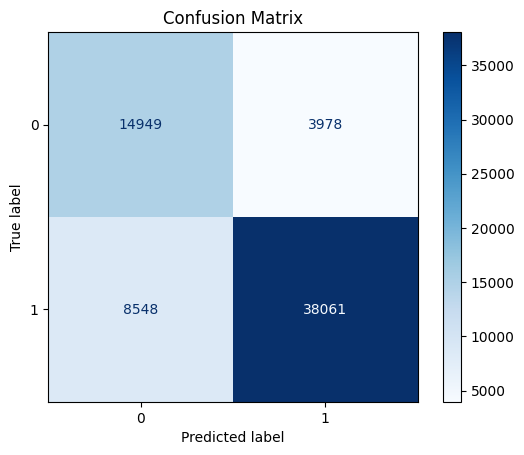

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import numpy as np
import rasterio

# Function to compute and visualize confusion matrix
def plot_confusion_matrix(y_pred, y_true):
    y_pred = y_pred.flatten()
    y_true = y_true.flatten()
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()

# Compute difference between NDVI and SAM masks
def compute_difference(ndvi_image, sam_mask):
    return ndvi_image - sam_mask

# Load the images
with rasterio.open('/content/sample_data/segment_12NDVI_another.tif') as ndvi_file:
    ndvi_image = ndvi_file.read(1)  # Read the first band
    ndvi_image = (ndvi_image > 0.6).astype(np.uint8)

with rasterio.open('/content/sample_data/mask_12.tif') as sam_file:
    sam_mask = sam_file.read(1)  # Read the first band
    sam_mask=(sam_mask > 0).astype(np.uint8)

print("NDVI image shape:", ndvi_image.shape)
print("SAM mask shape:", sam_mask.shape)

print("Unique values in NDVI binary:", np.unique(ndvi_image))
print("Unique values in SAM binary:", np.unique(sam_mask))
# Threshold NDVI to create binary ground truth (e.g., NDVI > 0.3 for vegetation)
# ndvi_binary = (ndvi_image > 0.3).astype(np.uint8)

# # Ensure the SAM mask is binary
# sam_binary = (sam_mask > 0).astype(np.uint8)

# Compute metrics
iou = compute_iou(sam_mask, ndvi_image)
dice = compute_dice(sam_mask, ndvi_image)
pixel_accuracy = compute_pixel_accuracy(sam_mask, ndvi_image)

# Print results
print(f"IoU: {iou:.4f}")
print(f"Dice Coefficient: {dice:.4f}")
print(f"Pixel Accuracy: {pixel_accuracy:.4f}")

# Visualize confusion matrix
plot_confusion_matrix(sam_mask, ndvi_image)

# Compute the difference between NDVI and SAM masks
difference = compute_difference(ndvi_image, sam_mask)

# Plot the difference
# plt.figure(figsize=(8, 8))
# plt.imshow(difference, cmap='RdBu', interpolation='none')
# plt.colorbar(label='Difference (NDVI - SAM)')
# plt.title("Difference Between NDVI and SAM Masks")
# plt.show()


# For dealing with PNG output:

IoU: 0.9462
Dice Coefficient: 0.9723
Pixel Accuracy: 0.9752


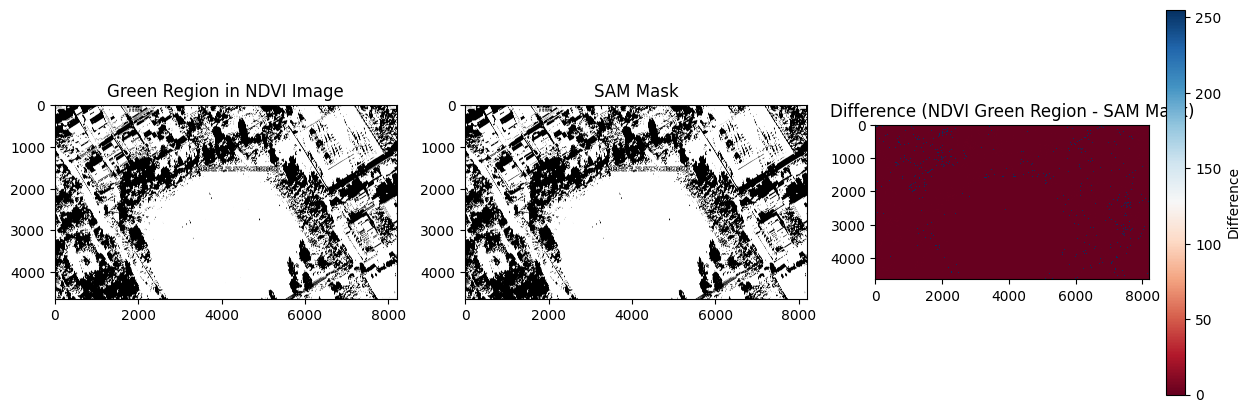

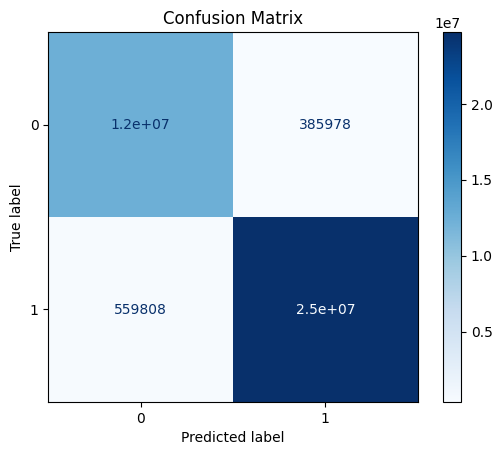

In [3]:
from PIL import Image
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Normalize image to 0-255 range
def normalize_image(image_array):
    return ((image_array - image_array.min()) / (image_array.max() - image_array.min()) * 255).astype(np.uint8)

# Binarize the image with a threshold
def load_and_binarize_image(image_path, threshold=128):
    image = Image.open(image_path).convert("L")  # Load as grayscale
    image_array = np.array(image)
    normalized_image = normalize_image(image_array)  # Normalize first
    binary_image = (normalized_image > threshold).astype(np.uint8)
    return binary_image

# Extract green region from RGB image
def extract_green_region(image_path, lower_bound=50, upper_bound=200):
    image = Image.open(image_path).convert("RGB")  # Load as RGB
    image_array = np.array(image)
    green_mask = (image_array[..., 1] > lower_bound) & (image_array[..., 1] < upper_bound)
    return green_mask.astype(np.uint8)

# Resize or crop images to match dimensions
def resize_image(image, target_shape):
    return np.array(Image.fromarray(image).resize((target_shape[1], target_shape[0]), Image.NEAREST))

# Metrics
def compute_iou(y_pred, y_true):
    y_pred = y_pred.flatten()
    y_true = y_true.flatten()
    current = confusion_matrix(y_true, y_pred, labels=[0, 1])
    intersection = np.diag(current)
    ground_truth_set = current.sum(axis=1)
    predicted_set = current.sum(axis=0)
    union = ground_truth_set + predicted_set - intersection
    IoU = intersection / union.astype(np.float32)
    return np.mean(IoU)

def compute_dice(y_pred, y_true):
    y_pred = y_pred.flatten()
    y_true = y_true.flatten()
    current = confusion_matrix(y_true, y_pred, labels=[0, 1])
    intersection = np.diag(current)
    ground_truth_set = current.sum(axis=1)
    predicted_set = current.sum(axis=0)
    dice = (2 * intersection) / (ground_truth_set + predicted_set).astype(np.float32)
    return np.mean(dice)

def compute_pixel_accuracy(y_pred, y_true):
    y_pred = y_pred.flatten()
    y_true = y_true.flatten()
    current = confusion_matrix(y_true, y_pred, labels=[0, 1])
    correct_pixels = np.diag(current).sum()
    total_pixels = current.sum()
    pixel_accuracy = correct_pixels / total_pixels
    return pixel_accuracy

def plot_confusion_matrix(y_pred, y_true):
    y_pred = y_pred.flatten()
    y_true = y_true.flatten()
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()

# Paths to images
ndvi_path = '/content/sample_data/isl_1.jpg'
sam_mask_path = '/content/sample_data/isl_1_hiera_large.png'

# Load and process images
# Extract green regions from NDVI image instead of simple binarization
ndvi_image = extract_green_region(ndvi_path, lower_bound=100, upper_bound=250)

# Binarize SAM mask
sam_mask = load_and_binarize_image(sam_mask_path, threshold=100)

# Ensure dimensions match
if ndvi_image.shape != sam_mask.shape:
    ndvi_image = resize_image(ndvi_image, sam_mask.shape)

# Compute metrics
iou = compute_iou(sam_mask, ndvi_image)
dice = compute_dice(sam_mask, ndvi_image)
pixel_accuracy = compute_pixel_accuracy(sam_mask, ndvi_image)

# Print results
print(f"IoU: {iou:.4f}")
print(f"Dice Coefficient: {dice:.4f}")
print(f"Pixel Accuracy: {pixel_accuracy:.4f}")

# Visualize images and differences
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Green Region in NDVI Image")
plt.imshow(ndvi_image, cmap='gray')
plt.subplot(1, 3, 2)
plt.title("SAM Mask")
plt.imshow(sam_mask, cmap='gray')
plt.subplot(1, 3, 3)
difference = ndvi_image - sam_mask
plt.title("Difference (NDVI Green Region - SAM Mask)")
plt.imshow(difference, cmap='RdBu', interpolation='none')
plt.colorbar(label='Difference')
plt.show()

# Confusion matrix
plot_confusion_matrix(sam_mask, ndvi_image)


# New Try

Colorized image saved to: colorized_green_regions.png
NDVI image shape: (4639, 8192)
Unique values in NDVI binary: [0 1]


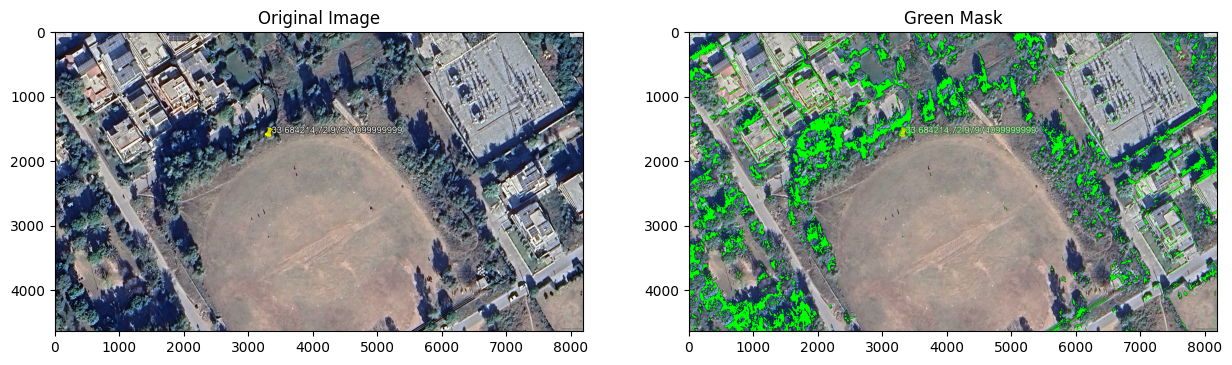

In [11]:
from PIL import Image
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Normalize image to 0-255 range
def normalize_image(image_array):
    return ((image_array - image_array.min()) / (image_array.max() - image_array.min()) * 255).astype(np.uint8)

# Binarize the image with a threshold
def load_and_binarize_image(image_path, threshold=128):
    image = Image.open(image_path).convert("L")  # Load as grayscale
    image_array = np.array(image)
    normalized_image = normalize_image(image_array)  # Normalize first
    binary_image = (normalized_image > threshold).astype(np.uint8)
    return binary_image, image_array

# Extract green region from RGB image
def extract_green_region(image_path, lower_bound=50, upper_bound=200):
    image = Image.open(image_path).convert("RGB")  # Load as RGB
    image_array = np.array(image)
    green_mask = (image_array[..., 1] > lower_bound) & (image_array[..., 1] < upper_bound)
    return green_mask.astype(np.uint8), image_array

# Colorize green regions
def colorize_green_regions(original_image, green_mask):
    colorized_image = original_image.copy()
    colorized_image[green_mask == 0] = [0, 255, 0]  # Set green regions to bright green
    return colorized_image

# Extract blue region from RGB image
def extract_blue_region(image_path, lower_bound=50, upper_bound=200):
    image = Image.open(image_path).convert("RGB")  # Load as RGB
    image_array = np.array(image)
    blue_mask = (image_array[..., 2] > lower_bound) & (image_array[..., 2] < upper_bound)
    return blue_mask.astype(np.uint8), image_array

# Colorize blue regions
def colorize_blue_regions(original_image, blue_mask):
    colorized_image = original_image.copy()
    colorized_image[blue_mask == 0] = [0, 0, 255]  # Set blue regions to bright blue
    return colorized_image


# Colorize the SAM masks
def colorize_SAM_mask(binary_mask, color=[0, 0, 255]):  # Default color: Red
    # Create an empty color image
    colorized_image = np.zeros((*binary_mask.shape, 3), dtype=np.uint8)
    # Apply color where the mask is 1
    colorized_image[binary_mask == 0] = color
    return colorized_image

# Resize or crop images to match dimensions
def resize_image(image, target_shape):
    return np.array(Image.fromarray(image).resize((target_shape[1], target_shape[0]), Image.NEAREST))

# Metrics
def compute_iou(y_pred, y_true):
    y_pred = y_pred.flatten()
    y_true = y_true.flatten()
    current = confusion_matrix(y_true, y_pred, labels=[0, 1])
    intersection = np.diag(current)
    ground_truth_set = current.sum(axis=1)
    predicted_set = current.sum(axis=0)
    union = ground_truth_set + predicted_set - intersection
    IoU = intersection / union.astype(np.float32)
    return np.mean(IoU)

def compute_dice(y_pred, y_true):
    y_pred = y_pred.flatten()
    y_true = y_true.flatten()
    current = confusion_matrix(y_true, y_pred, labels=[0, 1])
    intersection = np.diag(current)
    ground_truth_set = current.sum(axis=1)
    predicted_set = current.sum(axis=0)
    dice = (2 * intersection) / (ground_truth_set + predicted_set).astype(np.float32)
    return np.mean(dice)

def compute_pixel_accuracy(y_pred, y_true):
    y_pred = y_pred.flatten()
    y_true = y_true.flatten()
    current = confusion_matrix(y_true, y_pred, labels=[0, 1])
    correct_pixels = np.diag(current).sum()
    total_pixels = current.sum()
    pixel_accuracy = correct_pixels / total_pixels
    return pixel_accuracy

def plot_confusion_matrix(y_pred, y_true):
    y_pred = y_pred.flatten()
    y_true = y_true.flatten()
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()

# Paths to images
ndvi_path = '/content/sample_data/isl_1.jpg'
# sam_mask_path = '/content/sample_data/1213_Mask_hieraLarge.png'



# Load and process images
# Extract green regions from NDVI image instead of simple binarization
ndvi_image, green_colour_image = extract_green_region(ndvi_path, lower_bound=30, upper_bound=250)
# Colorize the green regions
colorized_image = colorize_green_regions(green_colour_image, ndvi_image)
colorized_image_path = "colorized_green_regions.png"
Image.fromarray(colorized_image).save(colorized_image_path)
print(f"Colorized image saved to: {colorized_image_path}")

print("NDVI image shape:", ndvi_image.shape)
print("Unique values in NDVI binary:", np.unique(ndvi_image))

# # Binarize SAM mask
# sam_mask, sam_image = load_and_binarize_image(sam_mask_path, threshold=100)
# # Colorize the Masks
# colorized_sam_mask = colorize_SAM_mask(sam_mask, color=[255, 0, 0])  # Red for SAM mask
# colorized_sam_mask_path = "colorized_sam_mask.png"
# Image.fromarray(colorized_sam_mask).save(colorized_sam_mask_path)
# print(f"Colorized SAM mask saved to: {colorized_sam_mask_path}")

# Step 1: Extract blue regions from SAM image
# blue_mask, sam_image = extract_blue_region(sam_mask_path, lower_bound=120, upper_bound=180)
# colorized_sam_image = colorize_blue_regions(sam_image, blue_mask)
# colorized_sam_image_path = "colorized_sam_blue_regions.png"
# Image.fromarray(colorized_sam_image).save(colorized_sam_image_path)
# print(f"Colorized SAM blue regions saved to: {colorized_sam_image_path}")


# print("SAM mask shape:", sam_mask.shape)
# print("Unique values in SAM binary:", np.unique(sam_mask))

# # Ensure dimensions match
# if ndvi_image.shape != sam_mask.shape:
#     ndvi_image = resize_image(ndvi_image, sam_mask.shape)

# # Compute metrics
# iou = compute_iou(sam_mask, ndvi_image)
# dice = compute_dice(sam_mask, ndvi_image)
# pixel_accuracy = compute_pixel_accuracy(sam_mask, ndvi_image)

# # Print results
# print(f"IoU: {iou:.4f}")
# print(f"Dice Coefficient: {dice:.4f}")
# print(f"Pixel Accuracy: {pixel_accuracy:.4f}")

# Visualize images and differences
plt.figure(figsize=(15, 5))
# plt.subplot(1, 3, 1)
# plt.title("Green Region in NDVI Image")
# plt.imshow(ndvi_image, cmap='gray')

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(green_colour_image, cmap='gray')
# Green Mask
plt.subplot(1, 2, 2)
plt.title("Green Mask")
plt.imshow(colorized_image, cmap='gray')


plt.show()

# Confusion matrix
# plot_confusion_matrix(sam_mask, ndvi_image)


# Extrac green Mask

ndvi mask shape: (4639, 8192)
Unique values in ndvi binary: [  0 255]


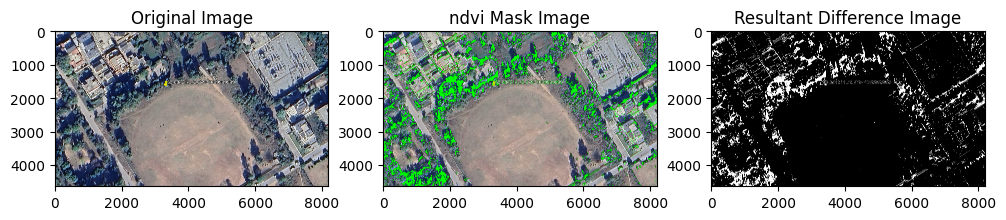

Resultant difference image saved to: NDVI_difference_result.png


In [20]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load images
original_image_path = '/content/sample_data/isl_1.jpg'  # Path to raw image
ndvi_mask_image_path = '/content/colorized_green_regions.png'  # Path to SAM mask image

# Load the images using PIL
original_image = Image.open(original_image_path).convert("RGB")  # Convert to RGB
ndvi_mask_image = Image.open(ndvi_mask_image_path).convert("RGB")  # Convert to RGB

# Convert to numpy arrays for processing
original_image_array = np.array(original_image)
ndvi_mask_image_array = np.array(ndvi_mask_image)

# Convert both images to grayscale (single channel)
original_gray = original_image.convert("L")  # Convert to grayscale
ndvi_mask_gray = ndvi_mask_image.convert("L")  # Convert to grayscale

# Convert grayscale images to numpy arrays
original_gray_array = np.array(original_gray)
ndvi_mask_gray_array = np.array(ndvi_mask_gray)

# Ensure both images have the ndvie shape (resize if necessary)
if original_gray_array.shape != ndvi_mask_gray_array.shape:
    print("Correcting the Shape")
    ndvi_mask_gray_array = np.array(Image.fromarray(ndvi_mask_gray_array).resize((original_gray_array.shape[1], original_gray_array.shape[0]), Image.NEAREST))

# Compute the absolute difference between the two grayscale images
difference_image = np.abs(original_gray_array.astype(np.int16) - ndvi_mask_gray_array.astype(np.int16))

# Threshold the difference to emphasize the extracted mask (e.g., a simple threshold of 50)
threshold = 30
ndvi_mask_difference = (difference_image > threshold).astype(np.uint8) * 255  # Convert to black and white

print("ndvi mask shape:", ndvi_mask_difference.shape)
print("Unique values in ndvi binary:", np.unique(ndvi_mask_difference))

# Convert back to an image format
result_image = Image.fromarray(ndvi_mask_difference)

# Save the resultant image (optional)
result_image_path = 'NDVI_difference_result.png'
result_image.save(result_image_path)

# Display the images
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(ndvi_mask_image)
plt.title("ndvi Mask Image")

plt.subplot(1, 3, 3)
plt.imshow(ndvi_mask_difference, cmap='gray')
plt.title("Resultant Difference Image")

plt.show()

print(f"Resultant difference image saved to: {result_image_path}")


# SAM mask

Correcting the Shape
SAM mask shape: (4639, 8192)
Unique values in SAM binary: [  0 255]


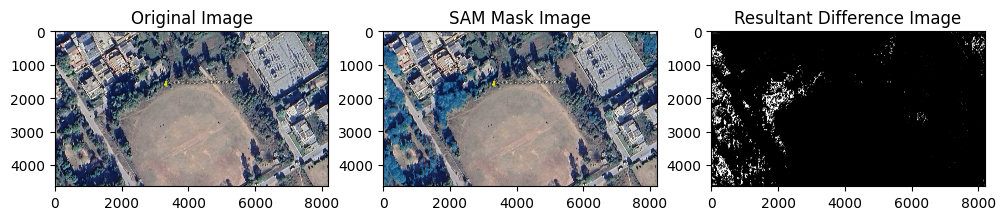

Resultant difference image saved to: SAM_difference_result.png


In [26]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load images
original_image_path = '/content/sample_data/isl_1.jpg'  # Path to raw image
sam_mask_image_path = '/content/sample_data/isl_1_hiera_large.png'  # Path to SAM mask image

# Load the images using PIL
original_image = Image.open(original_image_path).convert("RGB")  # Convert to RGB
sam_mask_image = Image.open(sam_mask_image_path).convert("RGB")  # Convert to RGB

# Convert to numpy arrays for processing
original_image_array = np.array(original_image)
sam_mask_image_array = np.array(sam_mask_image)

# Convert both images to grayscale (single channel)
original_gray = original_image.convert("L")  # Convert to grayscale
sam_mask_gray = sam_mask_image.convert("L")  # Convert to grayscale

# Convert grayscale images to numpy arrays
original_gray_array = np.array(original_gray)
sam_mask_gray_array = np.array(sam_mask_gray)

# Ensure both images have the same shape (resize if necessary)
if original_gray_array.shape != sam_mask_gray_array.shape:
    print("Correcting the Shape")
    sam_mask_gray_array = np.array(Image.fromarray(sam_mask_gray_array).resize((original_gray_array.shape[1], original_gray_array.shape[0]), Image.NEAREST))

# Compute the absolute difference between the two grayscale images
difference_image = np.abs(original_gray_array.astype(np.int16) - sam_mask_gray_array.astype(np.int16))

# Threshold the difference to emphasize the extracted mask (e.g., a simple threshold of 50)
threshold = 30
SAM_mask_difference = (difference_image > threshold).astype(np.uint8) * 255  # Convert to black and white

print("SAM mask shape:", SAM_mask_difference.shape)
print("Unique values in SAM binary:", np.unique(SAM_mask_difference))

# Convert back to an image format
result_image = Image.fromarray(SAM_mask_difference)

# Save the resultant image (optional)
result_image_path = 'SAM_difference_result.png'
result_image.save(result_image_path)

# Display the images
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(sam_mask_image)
plt.title("SAM Mask Image")

plt.subplot(1, 3, 3)
plt.imshow(SAM_mask_difference, cmap='gray')
plt.title("Resultant Difference Image")

plt.show()

print(f"Resultant difference image saved to: {result_image_path}")


# Compute Evaluation

NDVI image shape: (4639, 8192)
Unique values in NDVI binary: [  0 255]
SAM mask shape (after resize and binarization): (4639, 8192)
Unique values in SAM mask binary: [  0 255]
Count of 0 values in NDVI: 34477504
Count of 255 values in NDVI: 3525184
Count of 0 values in SAM: 36717887
Count of 255 values in SAM: 1284801
Unique values in normalized SAM mask: [0 1]
Unique values in normalized NDVI mask: [0 1]
Count of 0 values in NDVI: 34477504
Count of 1 values in NDVI: 3525184
Count of 0 values in sam: 36717887
Count of 1 values in sam: 1284801
IoU: 0.5236
Dice Coefficient: 0.6003
Pixel Accuracy: 0.9052


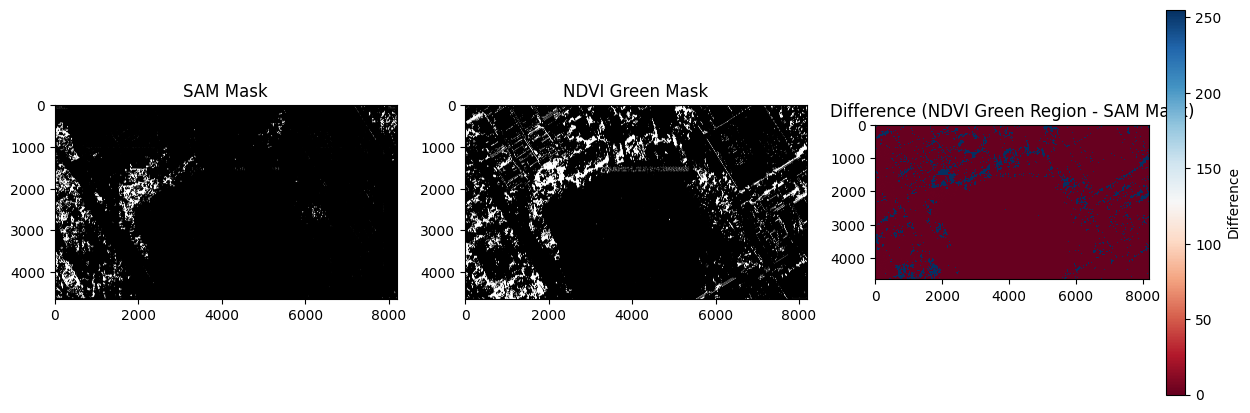

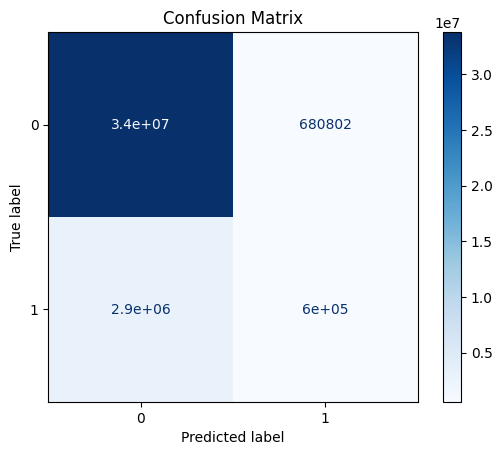

In [34]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load SAM mask image (original image with colorized SAM mask)
sam_mask_image_path = '/content/SAM_difference_result.png'  # Path to SAM mask image
ndvi_image_path = '/content/NDVI_difference_result.png'  # Path to NDVI image

# Load the images using PIL
sam_mask_image = Image.open(sam_mask_image_path).convert("RGB")  # Convert to RGB
ndvi_image = Image.open(ndvi_image_path).convert("L")  # Convert to grayscale for NDVI

# Convert to numpy arrays for processing
sam_mask_image_array = np.array(sam_mask_image)
ndvi_image_array = np.array(ndvi_image)

# Resize SAM mask to match the shape of NDVI image
if sam_mask_image_array.shape[:2] != ndvi_image_array.shape:
    sam_mask_image_resized = np.array(Image.fromarray(sam_mask_image_array).resize((ndvi_image_array.shape[1], ndvi_image_array.shape[0]), Image.NEAREST))
else:
    sam_mask_image_resized = sam_mask_image_array

# Convert the SAM mask image to grayscale (using the green channel as an example)
# You can modify this to use another channel (e.g., blue or red) based on your mask's characteristics
sam_mask_gray = sam_mask_image_resized[..., 1]  # Extract green channel (for example)

# Binarize the SAM mask (e.g., consider pixels above a certain threshold as mask pixels)
threshold = 100  # You can adjust this threshold based on your needs
sam_mask_binary = (sam_mask_gray > threshold).astype(np.uint8) * 255  # Convert to binary (0 and 255)

# Print shapes and unique values for verification
print("NDVI image shape:", ndvi_image_array.shape)
print("Unique values in NDVI binary:", np.unique(ndvi_image_array))
print("SAM mask shape (after resize and binarization):", sam_mask_binary.shape)
print("Unique values in SAM mask binary:", np.unique(sam_mask_binary))

# Count the number of 0 and 255 values in NDVI binary array
count_0_ndvi = np.sum(ndvi_image_array == 0)
count_255_ndvi = np.sum(ndvi_image_array == 255)

# Print the counts
print("Count of 0 values in NDVI:", count_0_ndvi)
print("Count of 255 values in NDVI:", count_255_ndvi)


# Count the number of 0 and 255 values in NDVI binary array
count_0_sam = np.sum(sam_mask_binary == 0)
count_255_sam = np.sum(sam_mask_binary == 255)

# Print the counts
print("Count of 0 values in SAM:", count_0_sam)
print("Count of 255 values in SAM:", count_255_sam)

# Normalize binary masks to have values 0 and 1
sam_mask_binary_normalized = (sam_mask_binary // 255).astype(np.uint8)
ndvi_image_binary_normalized = (ndvi_image_array // 255).astype(np.uint8)

# Print shapes and unique values for verification
print("Unique values in normalized SAM mask:", np.unique(sam_mask_binary_normalized))
print("Unique values in normalized NDVI mask:", np.unique(ndvi_image_binary_normalized))


# Count the number of 0 and 255 values in NDVI binary array
count_0_ndvi = np.sum(ndvi_image_binary_normalized == 0)
count_1_ndvi = np.sum(ndvi_image_binary_normalized == 1)

# Print the counts
print("Count of 0 values in NDVI:", count_0_ndvi)
print("Count of 1 values in NDVI:", count_1_ndvi)


# Count the number of 0 and 255 values in NDVI binary array
count_0_sam = np.sum(sam_mask_binary_normalized == 0)
count_1_sam = np.sum(sam_mask_binary_normalized == 1)

# Print the counts
print("Count of 0 values in sam:", count_0_sam)
print("Count of 1 values in sam:", count_1_sam)


# Compute metrics (IoU, Dice, pixel accuracy)
iou = compute_iou(sam_mask_binary_normalized, ndvi_image_binary_normalized)
dice = compute_dice(sam_mask_binary_normalized, ndvi_image_binary_normalized)
pixel_accuracy = compute_pixel_accuracy(sam_mask_binary_normalized, ndvi_image_binary_normalized)

# Print results
print(f"IoU: {iou:.4f}")
print(f"Dice Coefficient: {dice:.4f}")
print(f"Pixel Accuracy: {pixel_accuracy:.4f}")

# Visualize images and differences
plt.figure(figsize=(15, 5))

# Plot the SAM Mask
plt.subplot(1, 3, 1)
plt.title("SAM Mask")
plt.imshow(sam_mask_binary, cmap='gray')

# Plot the NDVI Green Mask (you can use `colorized_image` for visualization)
plt.subplot(1, 3, 2)
plt.title("NDVI Green Mask")
plt.imshow(ndvi_image_array, cmap='gray')

# Plot the difference
plt.subplot(1, 3, 3)
difference = ndvi_image_array - sam_mask_binary
plt.title("Difference (NDVI Green Region - SAM Mask)")
plt.imshow(difference, cmap='RdBu', interpolation='none')
plt.colorbar(label='Difference')
plt.show()

# Confusion matrix
plot_confusion_matrix(sam_mask_binary_normalized, ndvi_image_binary_normalized)
